# Работа со строковыми значениями

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Работа со строковыми значениям"
* https://pyformat.info/
* https://docs.python.org/3/library/re.html
    * https://docs.python.org/3/library/re.html#flags
    * https://docs.python.org/3/library/re.html#functions
* https://pythonru.com/primery/primery-primeneniya-regulyarnyh-vyrazheniy-v-python
* https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/
* https://realpython.com/nltk-nlp-python/

## Задачи для совместного разбора

1. Вывести на экран данные из словаря `obj` построчно в виде `k = v`, задав формат таким образом, чтобы знак равенства оказался на одной и той же позиции во всех строках. Строковые литералы обернуть в кавычки.

In [20]:
obj = {
    "home_page": "https://github.com/pypa/sampleproject",
    "keywords": "sample setuptools development",
    "license": "MIT",
}

# находим максимальную длину ключа
max_key_length = max(len(key) for key in obj.keys())
# распечатывыаем словарь используя максимальную длину
print(*[f"{key:{max_key_length}} = "{val}"" for key, val in obj.items()], sep='\n')

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2548024920.py, line 10)

2. Написать регулярное выражение,которое позволит найти номера групп студентов.

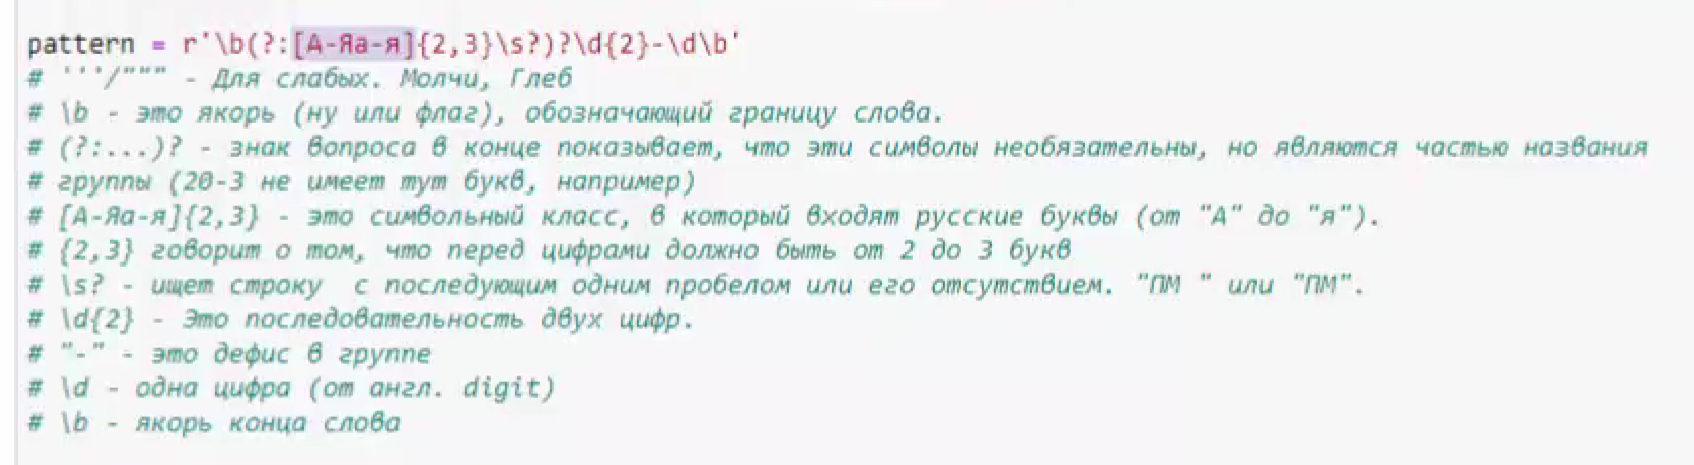

In [36]:
import pandas as pd
import re


obj = pd.Series(["Евгения гр.ПМ19-1", "Илья пм 20-4", "Анна 20-3"])

# гр\.\w{2}\d{2}-\d{1}

# гр\. - соответствует символам "гр." (группа)
# \w{2} - соответствует двум буквам (название факультета)
# \d{2} - соответствует двум цифрам (год набора)
# - - соответствует символу "-"
# \d{1} - соответствует одной цифре (номер группы)

# Создаем функцию для извлечения номеров групп
def extract_group_numbers(text):
    pattern = r"\d{2}-\d{1}"
    match = re.search(pattern, text)
    if match:
        return match.group()
    return None

# Применяем функцию к серии
group_numbers = obj.apply(extract_group_numbers)

# Выводим номера групп
print(group_numbers)

0    19-1
1    20-4
2    20-3
dtype: object


3. Разбейте текст формулировки задачи 2 на слова.

In [9]:
import re

sentence = "2. Написать регулярное выражение,которое позволит найти номера групп студентов. 1234 34"

# Удаляем точки и запятые из предложения
sentence = re.sub(r"[.,]", "", sentence)

# Разбиваем предложение на слова
words = re.findall(r"\w+", sentence)

# Выводим слова
print(words)

['2', 'Написать', 'регулярное', 'выражениекоторое', 'позволит', 'найти', 'номера', 'групп', 'студентов', '1234', '34']


In [3]:
import re

sentence = "2. Написать регулярное выражение,которое позволит найти номера групп студентов. 1234 34"

words = re.split(r"\W+", sentence)

# Выводим слова
print(words)

['2', 'Написать', 'регулярное', 'выражение', 'которое', 'позволит', 'найти', 'номера', 'групп', 'студентов', '1234', '34']


In [17]:
import re

sentence = "2. Написать регулярное выражение,которое позволит найти номера групп студентов. 1234 34"

words = sentence.split()  # оставляет точки!   'студентов.', '2.'

# Выводим слова
print(words)

['2.', 'Написать', 'регулярное', 'выражение,которое', 'позволит', 'найти', 'номера', 'групп', 'студентов.', '1234', '34']


## Лабораторная работа 6

### Форматирование строк

1\. Загрузите данные из файла `recipes_sample.csv` (__ЛР2__) в виде `pd.DataFrame` `recipes` При помощи форматирования строк выведите информацию об id рецепта и времени выполнения 5 случайных рецептов в виде таблицы следующего вида:

    
    |      id      |  minutes  |
    |--------------------------|
    |    61178     |    65     |
    |    202352    |    80     |
    |    364322    |    150    |
    |    26177     |    20     |
    |    224785    |    35     |
    
Обратите внимание, что ширина столбцов заранее неизвестна и должна рассчитываться динамически, в зависимости от тех данных, которые были выбраны. 

In [2]:
import pandas as pd

# Загружаем данные из файла
recipes = pd.read_csv('data/recipes_sample.csv')

# Выбираем 5 случайных рецептов
random_recipes = recipes.sample(5)


In [3]:
max_id_length = random_recipes['id'].astype(str).str.len().max()
max_minutes_length = random_recipes['minutes'].astype(str).str.len().max()


6
3


In [6]:
# Создание строки с информацией о каждом рецепте
info_strings = []
for index in range(5):
    info_strings.append(f"|{recipes['id'][index]: >{max_id_length+2}}|{recipes['minutes'][index]: >{max_minutes_length+7}}|")

# Вывод информации в формате Markdown таблицы
print(f"|{'id': >{max_id_length+2}}|{'minutes': >{max_minutes_length+7}}|")
print("------------------------")
for string in info_strings:
    print(string)
    

|      id|   minutes|
------------------------
|   44123|        90|
|   67664|        10|
|   38798|        30|
|   35173|        45|
|   84797|        25|


In [8]:
info_strings = []
for index in range(5):
    info_strings.append(f"|{recipes['id'][index]: ^{max_id_length+2}}|{recipes['minutes'][index]: ^{max_minutes_length+7}}|")


# Вывод информации в формате Markdown таблицы
print(f"|{'id': ^{max_id_length+2}}|{'minutes': ^{max_minutes_length+7}}|")
print("------------------------")
for string in info_strings:
    print(string)

|   id   | minutes  |
------------------------
| 44123  |    90    |
| 67664  |    10    |
| 38798  |    30    |
| 35173  |    45    |
| 84797  |    25    |


2\. Напишите функцию `show_info`, которая по данным о рецепте создает строку (в смысле объекта python) с описанием следующего вида:

```
"Название Из Нескольких Слов"

1. Шаг 1
2. Шаг 2
----------
Автор: contributor_id
Среднее время приготовления: minutes минут
```

    
Данные для создания строки получите из файлов `recipes_sample.csv` (__ЛР2__) и `steps_sample.xml` (__ЛР3__). 
Вызовите данную функцию для рецепта с id `170895` и выведите (через `print`) полученную строку на экран.

In [21]:
import pandas as pd
import xml.etree.ElementTree as ET

# Шаг 1: Загрузите данные из файла CSV
# Загружаем данные рецептов из CSV файла в DataFrame
recipes = pd.read_csv('recipes_sample.csv')

# Шаг 2: Загрузите данные из файла XML
# Загружаем данные шагов рецептов из XML файла
tree = ET.parse('steps_sample.xml')
root = tree.getroot()

# Шаг 3: Функция для получения шагов рецепта по его id
# Определяем функцию, которая принимает id рецепта и возвращает список шагов приготовления
def get_steps(recipe_id):
    # Проходим по всем рецептам в XML
    for recipe in root.findall('recipe'):
        # Если найден рецепт с нужным id
        if recipe.find('id').text == str(recipe_id):
            # Извлекаем все шаги и возвращаем их как список
            steps = [step.text for step in recipe.find('steps').findall('step')]
            return steps
    # Если рецепт не найден, возвращаем пустой список
    return []

# Шаг 4: Создание функции show_info
# Определяем функцию для форматирования и вывода информации о рецепте
def show_info(name, steps, minutes, author_id):
    # Преобразуем название рецепта в заглавные буквы
    title = name.title()
    # Форматируем шаги приготовления
    steps_str = '\n'.join([f"{i+1}. {step}" for i, step in enumerate(steps)])
    # Формируем итоговую строку с информацией о рецепте
    result = (
        f'"{title}"\n\n'                     # Заголовок с названием рецепта
        f"{steps_str}\n"                    # Список шагов приготовления
        "----------\n"                      # Разделитель
        f"Автор: {author_id}\n"             # Информация об авторе рецепта
        f"Среднее время приготовления: {minutes} минут\n"  # Информация о времени приготовления
    )
    return result

# Шаг 5: Получите данные для рецепта с id 170895
# Задаем id рецепта, который будем искать
recipe_id = 170895
# Находим данные о рецепте в DataFrame по id
recipe_data = recipes[recipes['id'] == recipe_id].iloc[0]
# Извлекаем название рецепта
name = recipe_data['name']
# Извлекаем среднее время приготовления
minutes = recipe_data['minutes']
# Извлекаем id автора рецепта
author_id = recipe_data['contributor_id']
# Получаем список шагов приготовления для данного рецепта
steps = get_steps(recipe_id)

# Вызов функции и вывод результата
# Форматируем и выводим информацию о рецепте
result = show_info(name, steps, minutes, author_id)
print(result)

"Leeks And Parsnips  Sauteed Or Creamed"

1. clean the leeks and discard the dark green portions
2. cut the leeks lengthwise then into one-inch pieces
3. melt the butter in a medium skillet , med
4. heat
5. add the garlic and fry 'til fragrant
6. add leeks and fry until the leeks are tender , about 6-minutes
7. meanwhile , peel and chunk the parsnips into one-inch pieces
8. place in a steaming basket and steam 'til they are as tender as you prefer
9. i like them fork-tender
10. drain parsnips and add to the skillet with the leeks
11. add salt and pepper
12. gently sautee together for 5-minutes
13. at this point you can serve it , or continue on and cream it:
14. in a jar with a screw top , add the half-n-half and arrowroot
15. shake 'til blended
16. turn heat to low under the leeks and parsnips
17. pour in the arrowroot mixture , stirring gently as you pour
18. if too thick , gradually add the water
19. let simmer for a couple of minutes
20. taste to adjust seasoning , probably an addi

In [ ]:
assert (
    show_info(
        name="george s at the cove black bean soup",
        steps=[
            "clean the leeks and discard the dark green portions",
            "cut the leeks lengthwise then into one-inch pieces",
            "melt the butter in a medium skillet , med",
        ],
        minutes=90,
        author_id=35193,
    )
    == '"George S At The Cove Black Bean Soup"\n\n1. Clean the leeks and discard the dark green portions\n2. Cut the leeks lengthwise then into one-inch pieces\n3. Melt the butter in a medium skillet , med\n----------\nАвтор: 35193\nСреднее время приготовления: 90 минут\n'
)

## Работа с регулярными выражениями

3\. Напишите регулярное выражение, которое ищет следующий паттерн в строке: число (1 цифра или более), затем пробел, затем слова: hour или hours или minute или minutes. Произведите поиск по данному регулярному выражению в каждом шаге рецепта с id 25082. Выведите на экран все непустые результаты, найденные по данному шаблону.

In [22]:
import re

# Функция для извлечения шагов рецепта по его id
# Эта функция принимает id рецепта и возвращает список шагов приготовления
def get_steps(recipe_id):
    for recipe in root.findall('recipe'):
        if recipe.find('id').text == str(recipe_id):
            steps = [step.text for step in recipe.find('steps').findall('step')]
            return steps
    return []

# Получение шагов рецепта с id 25082
# Задаем id рецепта, который будем искать
recipe_id = 25082
# Получаем список шагов приготовления для данного рецепта
steps = get_steps(recipe_id)

# Регулярное выражение для поиска числа, за которым следует пробел и одно из указанных слов
# Этот шаблон находит числа, за которыми идут слова "hour", "hours", "minute", "minutes"
pattern = r'\d+\s+(?:hour|hours|minute|minutes)'

# Поиск и вывод результатов по шаблону в каждом шаге рецепта
# Проходим по каждому шагу из списка шагов
for step in steps:
    # Ищем все совпадения с регулярным выражением в текущем шаге
    matches = re.findall(pattern, step)
    # Если есть совпадения, выводим их
    if matches:
        print(matches)

['20 minute']
['10 minute']
['2 hour']
['10 minute']
['20 minute', '30 minute']


4\. Напишите регулярное выражение, которое ищет шаблон вида "this..., but" _в начале строки_ . Между словом "this" и частью ", but" может находиться произвольное число букв, цифр, знаков подчеркивания и пробелов. Никаких других символов вместо многоточия быть не может. Пробел между запятой и словом "but" может присутствовать или отсутствовать.

Используя строковые методы `pd.Series`, выясните, для каких рецептов данный шаблон содержится в тексте описания. Выведите на экран количество таких рецептов и 3 примера подходящих описаний (текст описания должен быть виден на экране полностью).

In [23]:
import pandas as pd

# Загрузите данные из файла CSV
# Читаем данные из файла CSV в DataFrame
recipes = pd.read_csv('recipes_sample.csv')

# Заменить пропущенные значения пустой строкой
# Заполняем пропущенные значения в столбце 'description' пустыми строками
recipes['description'] = recipes['description'].fillna('')

# Поиск совпадений в тексте описания для каждого рецепта
# Ищем совпадения с шаблоном в описании каждого рецепта
# Шаблон ищет строки, начинающиеся с "this", за которыми следуют любые слова и пробелы, а затем "but"
matches = recipes['description'].str.contains(r'^this[\w\s]*, but', regex=True, case=False)

# Подсчет количества рецептов, содержащих данный шаблон
# Считаем количество строк, содержащих совпадения с шаблоном
count = matches.sum()
print("Количество рецептов с данным шаблоном:", count)

# Вывод трех примеров подходящих описаний
# Выводим три первых описания, которые соответствуют шаблону
print("\nПримеры подходящих описаний:")
for description in recipes[matches]['description'].head(3):
    print(description)

Количество рецептов с данным шаблоном: 131

Примеры подходящих описаний:
this was adapted from a recipe i found on the net, but i added julienne onion to the peppers.  this is a meal in itself, or you could have a small slice with a meat dish.  for those that like to have brunch, it's a bit different to your traditional quiche recipes.  if you love cheese, you could add 1/2 cup of your favorite to the egg mixture, then pour over peppers.
this is kind of similar to some of the other versions out there, but it is the best and easiest i have found
this is a moist, buttery apple cake.  the dough is best made the night before, put in the fridge and then filled and baked the next morning.


5\. В текстах шагов рецептов обыкновенные дроби имеют вид "a / b". Используя регулярные выражения, уберите в тексте шагов рецепта с id 72367 пробелы до и после символа дроби. Выведите на экран шаги этого рецепта после их изменения.

In [24]:
import re
import xml.etree.ElementTree as ET

# Функция для удаления пробелов перед и после символов дроби в тексте шага
def remove_fraction_spaces(step_text):
    # Регулярное выражение для поиска пробелов перед и после символов дроби
    pattern = r'\s*\/\s*'
    # Замена пробелов перед и после символов дроби на пустую строку
    step_text = re.sub(pattern, '/', step_text)
    return step_text

# Загрузка данных о шагах приготовления из файла steps_sample.xml
tree = ET.parse('steps_sample.xml')
root = tree.getroot()

# Находим шаги для рецепта с id 72367
recipe_id = '72367'
# Используем XPath для поиска нужного рецепта и его шагов
steps = root.find("./recipe[id='{}']/steps".format(recipe_id))

# Вывод исходных шагов
print("Исходные шаги:")
for step in steps.findall('step'):
    print(step.text)

# Удаление пробелов перед и после символов дроби в текстах шагов
for step in steps.findall('step'):
    step.text = remove_fraction_spaces(step.text)

# Вывод измененных шагов
print("\nШаги после удаления пробелов перед и после символов дроби:")
for step in steps.findall('step'):
    print(step.text)

Исходные шаги:
mix butter , flour , 1 / 3 c
sugar and 1-1 / 4 t
vanilla
press into greased 9" springform pan
mix cream cheese , 1 / 4 c
sugar , eggs and 1 / 2 t
vanilla beating until fluffy
pour over dough
combine apples , 1 / 3 c
sugar and cinnamon
arrange on top of cream cheese mixture and sprinkle with almonds
bake at 350 for 45-55 minutes , or until tester comes out clean

Шаги после удаления пробелов перед и после символов дроби:
mix butter , flour , 1/3 c
sugar and 1-1/4 t
vanilla
press into greased 9" springform pan
mix cream cheese , 1/4 c
sugar , eggs and 1/2 t
vanilla beating until fluffy
pour over dough
combine apples , 1/3 c
sugar and cinnamon
arrange on top of cream cheese mixture and sprinkle with almonds
bake at 350 for 45-55 minutes , or until tester comes out clean


### Сегментация текста

6\. Разбейте тексты шагов рецептов на слова при помощи пакета `nltk`. Посчитайте и выведите на экран кол-во уникальных слов среди всех рецептов. Словом называется любая последовательность алфавитных символов (для проверки можно воспользоваться `str.isalpha`). При подсчете количества уникальных слов не учитывайте регистр.

In [1]:
from bs4 import BeautifulSoup


# считывание xml файла
with open('steps_sample.xml', 'r') as file:
    steps_sample = BeautifulSoup(file, 'xml')
    

`nltk.download('punkt')`

 Загружает модуль токенизации Punkt, который разбивает текст на токены (слова, знаки препинания и т. д.). Это основной модуль токенизации, используемый в NLTK.

`nltk.download('averaged_perceptron_tagger')`

 Загружает модель тегирования частями речи с помощью усредненного персептрона, которая присваивает каждому токену в тексте его часть речи (существительное, глагол, прилагательное и т. д.). Это один из наиболее точных теггеров частей речи, доступных в NLTK.

Вместе эти загрузки позволяют вам выполнять основные задачи обработки естественного языка, такие как токенизация и тегирование частей речи, в ваших программах на Python с использованием NLTK.

In [8]:
import nltk


# для работы с библиотекой ntlk требуется загрузить:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to C:\Users\Antonova
[nltk_data]     Alena\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Antonova Alena\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [9]:
# определяем шаги рецептов
steps = []
for recipe in steps_sample.recipes.find_all('recipe'):
        steps.append([step.next for step in recipe.steps.find_all('step')])

# создаем последовательносьб слов
words = nltk.word_tokenize(' '.join([' '.join(i) for i in steps])) 

# определяем количество уникальных слов, создаем множество уникальных и смотрим длину множества
# при этом проверяем является ли слово словом методом isalpha()
# не учитываем регистр
print(len(set(word.lower() for word in words if word.isalpha())))

14926


7\. Разбейте описания рецептов из `recipes` на предложения при помощи пакета `nltk`. Найдите 5 самых длинных описаний (по количеству _предложений_) рецептов в датасете и выведите строки фрейма, соответствующие этим рецептами, в порядке убывания длины.

In [11]:
import pandas as pd
# используем библиотеку nltk  (см 6 задание)

recipes_sample = pd.read_csv('recipes_sample.csv')

# создаем столбец кол-ва предложений
recipes_sample['n_sent'] = recipes_sample['description'].apply(lambda i: len(nltk.sent_tokenize(str(i))))

# выводим the largest n=5 elements для столбца n_sent
recipes_sample.nlargest(5, ['n_sent'])

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,n_sent
18408,my favorite buttercream icing for decorating,334113,30,681465,2008-10-30,12.0,this wonderful icing is used for icing cakes a...,NaN,76
481,alligator claws avocado fritters with chipot...,287008,45,765354,2008-02-19,NaN,a translucent golden-brown crust allows the gr...,9.0,27
22566,rich barley mushroom soup,328708,60,221776,2008-10-03,NaN,this is one of the best soups i've ever made a...,10.0,24
6779,chocolate tea,205348,6,428824,2007-01-14,NaN,i wrote this because there are an astounding l...,NaN,23
16296,little bunny foo foo cake carrot cake with c...,316000,68,689540,2008-07-27,14.0,the first time i made this cake i grated a mil...,NaN,23


8\. Напишите функцию, которая для заданного предложения выводит информацию о частях речи слов, входящих в предложение, в следующем виде:
```
PRP   VBD   DT      NNS     CC   VBD      NNS        RB   
 I  omitted the raspberries and added strawberries instead
``` 
Для определения части речи слова можно воспользоваться `nltk.pos_tag`.

Проверьте работоспособность функции на названии рецепта с id 241106.

Обратите внимание, что часть речи должна находиться ровно посередине над соотвествующим словом, а между самими словами должен быть ровно один пробел.


In [12]:
recipes_sample = pd.read_csv('recipes_sample.csv')
recipes_sample.head()


,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN


In [13]:
recipes_sample[recipes_sample['id'] == 241106]['name'].values


array(['eggplant steaks with chickpeas  feta cheese and black olives'],
      dtype=object)

In [14]:
sent = 'eggplant steaks with chickpeas  feta cheese and black olives'
def sent_tag(sent):
    w = nltk.tag.pos_tag(nltk.word_tokenize(sent))
    up, down = '', ''
    for i in w:
        up += f' {i[1]: ^{len(i[0])}}'
        down += i[0]+' '
    return up+'\n'+down
print(sent_tag(sent))


    JJ     NNS    IN     NNS    VBP    JJ   CC   JJ    NNS  
eggplant steaks with chickpeas feta cheese and black olives 
